<table border="0" width="100%"><tr><td width=80 bgcolor="white"><p align="left">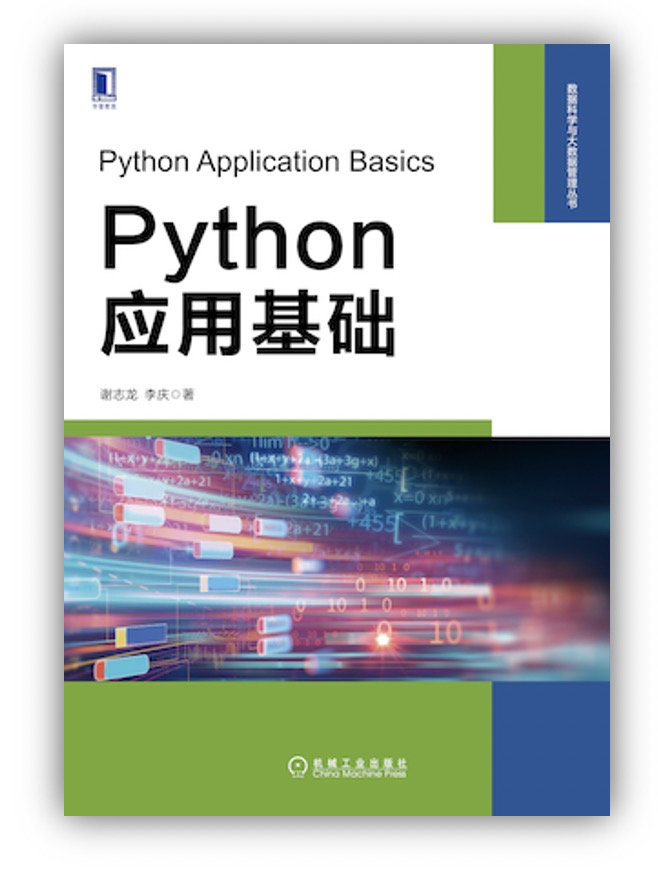</p></td><td align="center" bgcolor="white"><font size="7">第7章 数据存取：文件</font></td></tr></table>

<hr style="border:none;border-top:1px dotted red;">

## 学习目标
- 掌握文件与路径的概念
- 熟悉文本文件与二进制文件的区别
- 熟练掌握文件打开、关闭、读取和写入操作
- 掌握 with 语句的用法
- 掌握 pickle 文件的用法
- 了解 JSON 格式的用法
- 灵活运用文件解决实际问题

<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498379" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

## 引导案例
<font size=3 face="楷体-简">到目前为止，小明的生活费管理程序的功能设计已经非常清晰。每块功能都可以通过所学习的程序设计知识来实现。 但遗憾的是， 每次程序运行后， 都需要重新输入所有数 据。小明输入的数据无法保存下来。

因此，小明希望这个生活费管理程序可以将每次输入的信息保存下来。这样可以随时 添加新的支出信息，并进行查询、统计和分析。</font>

### 案例分析
通过以上描述可知， 小明希望将输入的信息像文件一样存储下来，便于今后的查询、统计和分析。 

通过对本章的学习，请你编写程序帮助小明实现学习用品详细信息的存储和读取。

通常来说， 在 Python 中永久存储数据主要通过文件和数据库两种方式来实现。 本章 我们将学习与文件相关的基础知识，有关数据库的知识将在第 10 章学习。

## 7.1　文件与路径
<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498383" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

在计算机中，**文件**指的是存储在磁盘上的数据序列，它可以包含任何数据内容。

**文件名**是文件的一个重要属性。文件名通常由文件主名和扩展名构成。一般来说， 主名和扩展名之间用一个圆点“.”隔开。 扩展名由 1 ～ 4 个字符组成，用于表示文件的类型。 例如：report.docx 是主名为report、扩展名为docx 的word文档，searchGoods.py 是主名为searchGoods、扩展名为 py 的 Python 源文件。

计算机中使用**文件夹**（也常常称为目录）来组织文件。文件夹可以包含文件和其他文件夹。

路径指明了文件在计算机中存储的位置。路径中包含了存储文件的各级文件夹。文件夹之间用斜线隔开。在 Windows 中使用倒斜杠``\``来分隔，在 Mac OS X 和 Linux 中使 用正斜杠``/``作为路径分隔符。有两种方式表示文件路径。

- 绝对路径：从根目录开始的路径。
- 相对路径：从当前工作目录开始的路径。

还有点``.``和点点``..``文件夹。它们不是真正的文件夹，而是可以在路径中使用的特殊名称。单个的句点（“点”）用作文件夹目名称时，是“这个目录”的缩写。两个句点（“点点”）意思是父文件夹。


每个运行在计算机上的程序， 都有一个“当前工作目录”。 在 Python 中， 可以用 os 模块中的 getcwd() 方法获取当前工作目录：

In [ ]:
import os
os.getcwd()

假如在根目录的 Users 文件夹下有一个文件夹 xiezhilong， 其中有一个 Documents 文 件夹，存储了 report.docx 文件。

用绝对路径描述这个文件的位置为：

```python
/Users/xiezhilong/Documents/report.docx
```

如果当前工作目录是 /Users/xiezhilong，用相对路径描述这个文件的位置为：
```python
Documents/report.docx
```

在 os 模块中还包含大量文件相关操作的方法。 例如，``listdir(path=None)`` 方法返回指 定目录中包含的文件和子目录列表，默认情况下返回当前工作目录中的信息。

In [ ]:
os.listdir('Data/Sales')

## 7.2　文本文件与二进制文件
<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498387" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

计算机上存储的文件都是以二进制存储的，一般可以采取以下两种方式读取：
- 文本文件：文件内容是常规的字符， 不会包含字体、大小和颜色等信息， 例如带 有 .py 扩展名的 Python 源文件。
- 二进制文件：文件内容是特殊的字节数据， 例如 Word 文档、PDF 文档、图像文件 和编译后的可执行文件。

计算机中使用字符集表示字符。最常用的美国标准信息交换代码（American Standard Code for Information Interchange，ASCII 码）定义了从 0 到 127 的整数对应的字符。

In [ ]:
ord('a')

In [ ]:
chr(97)

Unicode 突破了 ASCII 码只能表示英文字母和符号的限制， 为每种语言的每个字符设定了唯一的编码，以满足跨语言、跨平台进行文本转换和处理的要求。

In [ ]:
ord('你')

将 Unicode 字符按照特定编码规则（例如 UTF8 编码）翻译为原始字节形式的过程被称为**编码**。反过来，把原始字节翻译为 Unicode 字符串的过程则被称为**解码**。

## 7.3　操作文件
<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498392" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

在 Python 中，操作文件包含 3 个步骤： 

（1）调用 ``open()`` 函数打开物理文件，返回一个文件对象。<br>
（2）调用文件对象的 ``read()`` 或 ``write()`` 方法读写文件。<br>
（3）调用文件对象关闭文件。<br>

### 7.3.1　打开文件
Python 通过内置的 ``open()`` 函数打开文件并创建该对象。
```python
open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
```

In [ ]:
emp_file = open('data/employees.txt')
type(emp_file)

In [ ]:
emp_file

利用内置 ``open()`` 函数创建文件对象赋值给 emp_file 后， 直接查看其内容可以看到该 对象打开的物理文件（含路径和文件名），打开模式和编码。打开文件如图所示:
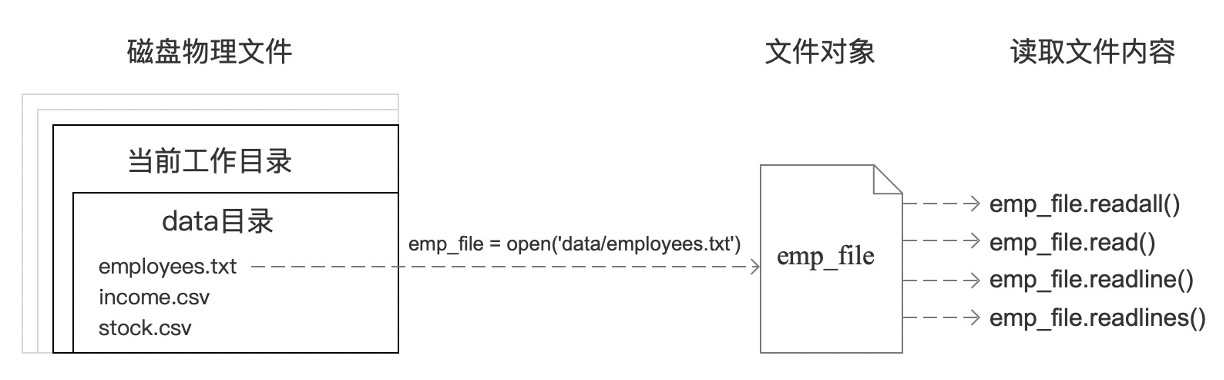

参数 ``mode`` 是打开文件的模式，如表所示，默认值为 'r':

|模式|说明|
|-----|:-----|
|'r'|只读模式，如果文件不存在，返回异常FileNotFoundError，默认值|
|'w'|覆盖写模式，文件不存在则创建，存在则完全覆盖源文件|
|'x'|创建写模式，文件不存在则创建，存在则返回异常FileExistsError|
|'a'|追加写模式，文件不存在则创建，存在则在原文件最后追加内容|
|'b'|二进制文件模式|
|'t'|文本文件模式，默认值|
|'+'|与r/w/x/a一同使用，在原功能基础上增加同时读写功能|

参数 ``encoding`` 是指定文本文件读取数据时解码或写入数据时编码所用的规则， 为默认值 None 时使用的规则取决于操作系统。通过 sys 模块的方法可以查看当前默认编码。

In [ ]:
import sys
sys.getdefaultencoding()

### 7.3.2　关闭文件
在操作完文件后，必须将文件关闭，这点非常重要。

调用文件对象的 ``close()`` 方法可以关闭文件， 终止文件对象与磁盘物理文件的连接、 释放操作系统资源。在写入和追加写入模式下，暂存于内存中的文件内容会输出到磁盘中永久保存。

In [ ]:
emp_file.close()

### 7.3.3　写入文本文件
当指定 ``open()`` 函数的 mode 参数值为 'w' 'x' 和 'a' 时，可以向创建的文件对象中写入数 据。使用文件对象的 ``write()`` 方法就可以将文本写入文件中。
```python
file_obj.write(text)
```

<font color=#A93226><b>【例 7-1】</b></font> <font size=3 face="楷体-简">用户输入商品名称和销售额，将输入的明细和合计信息存储到文件 sales.txt 中。</font>

程序代码如下所示：

In [ ]:
sales = []
sale_amt = 0
while True:
    sale_info = input('请输入商品名称和销售额（用逗号隔开，直接回车结束）：')
    if len(sale_info) == 0:
        break
    goods_name, amount = sale_info.split(',')
    sale_amt = sale_amt + float(amount)
    sales.append([goods_name, amount])
sale_file = open('sales.txt', 'w', encoding='utf-8')
sale_file.write('销售明细:\n')
for goods_name, amount in sales:
    sale_file.write(goods_name + ',' + amount + '\n')
sale_file.write('\n\n')
sale_file.write('销售额合计：{:.2f}元\n'.format(sale_amt))
sale_file.close()

程序运行结束后，在当前工作目录下产生 sales.txt 文件。

### 7.3.4　读取文本文件
在 Python 中， 使用 ``open()`` 函数打开文件时，mode 参数的默认值是“ rt”， 即以文本文件的形式读取文件。
#### 1. 使用文件内置方法读取
对于可读的文件对象，可以使用表的四种方法读取内容：

|方法|说明|
|---|:---|
|&lt;file&gt;.readall()|以字符串形式返回整个文件内容|
|&lt;file&gt;.read(size=-1)|默认读入从当前位置至文件末尾的内容；当size参数为大于0的正整数n时， 从文件中读入最多n个字符|
|&lt;file&gt;.readline(size = -1)|默认从文件中读入一行内容；当size参数为大于0的正整数n时， 从当前行读入最多n个字符|
|&lt;file&gt;.readlines(hint=-1)|默认返回以文件中所有行为元素构成的列表；当hint参数为大于0的正整数n时，读入的所有行字符数不超过 n行|

当打开文本文件时，会有一个指针指向文件开头的字符。每次读取数据后，指针会往后移动到相应位置。 例如，在使用 ``readline()`` 读入一行内容时， 指针会移动到下一个换行符的后面，直到指向文件尾部标记 EOF（end of file）。读入文件内容的示例如图所示：
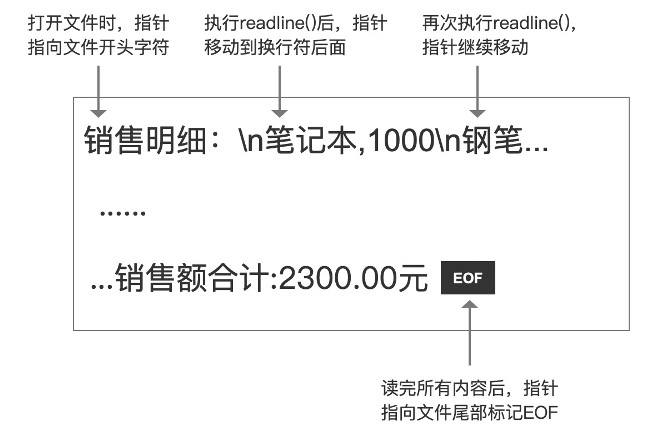

#### 2. 使用 for 循环逐行读取
在绝大多数情况下，对于文本文件的读取都是逐行读取。文件对象本身是一个可迭代对象。 因此，通常情况下，推荐使用 ``for`` 循环来逐行读取文本文件内容。

In [ ]:
in_file = open('sales.txt', encoding='utf-8')
for line in in_file:
    print(line, end='')
in_file.close()

#### 3. 使用列表推导式和 map() 函数逐行处理
文件作为可迭代对象， 可以使用列表推导式和 ``map()`` 函数对每行进行相应处理， 生成新的列表。

In [ ]:
in_file = open('sales.txt', encoding='utf-8')
lines = [line.rstrip() for line in in_file]
lines

In [ ]:
in_file.close()

In [ ]:
lines = list(map(lambda line: line.rstrip(), open('sales.txt')))
lines

### 7.3.5　使用 with 语句自动管理
Python 中的 with 语句适用于对资源进行访问的场合， 确保不管使用过程中是否发生异常都会释放资源，比如文件使用后自动关闭。

In [ ]:
with open('sales.txt', encoding='utf-8') as sales_file:
    for line in sales_file:
        print(line, end='')

<font color=#A93226><b>【课堂案例】</b></font> <font size=3 face="楷体-简">请统计Data文件夹下employees.txt文件的中女员工的个数。</font>

In [ ]:
def isFemaleByIDCard(idCard):
    if len(idCard) == 18:
        return 1 if int(idCard[16]) % 2 == 0 else 0
    elif len(idCard) == 15:
        return 1 if int(idCard[13] % 2) == 0 else 0
    else:
        return 0

femaleCount = 0

with open("Data/employees.txt", encoding='gbk') as empFile:
    empFile.readline()
    for line in empFile:
        empInfoList = line.strip().split(',')
        femaleCount += isFemaleByIDCard(empInfoList[5])
        
print("女员工的人数是：{}人".format(femaleCount))

## 7.4 <font color=#A93226>案例：</font>销售统计
<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498395" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

<font size=3 face="楷体-简">sales 目录下的文件是某便利店每个月的销售数据，文件按照年份和月份命名。例如 2020_01.csv 是2020年1月的销售数据。
    
文件的第一行是标题，从第二行开始是具体销售数据，数据之间用逗号隔开，如图所示:
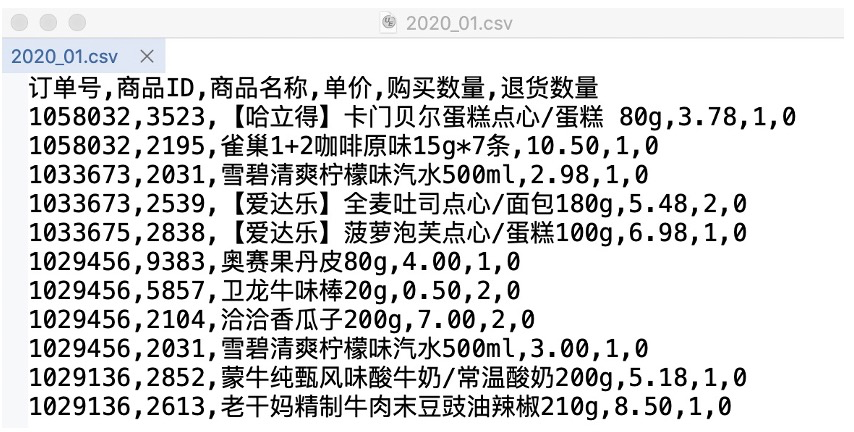

现需要统计每个月的销售额以及总销售额，并将统计结果写入文本文件 statistic.txt 中。

</font>

以纯文本形式按行存储表格数据，每行的值之间使用逗号分隔，是一种通用的文件格式， 称为 ``CSV``（comma-separated values）文件。Python 提供了丰富的第三方库对这类文 件进行操作，例如 ``csv`` 模块和 ``pandas`` 等。

在这里，为熟悉文件操作过程，使用 Python 自带的文件操作功能来完成统计工作。

程序代码如下所示：

In [ ]:
import os
stat_dic = {}
file_list = os.listdir('Data/Sales')
for file_name in file_list:
    if not file_name.endswith('csv'):
        continue
    with open(os.path.join('Data/Sales', file_name), encoding='utf-8') as sales_file:
        first_line_flag = True
        month_amount = 0
        for line in sales_file:
            if first_line_flag:
                first_line_flag = False
                continue
            rec = line.rstrip().split(',')
            month_amount += float(rec[-3]) * (float(rec[-2]) - float(rec[-1]))
        month_name = file_name[:4] + '年' + file_name[5:7] + '月'
        stat_dic[month_name] = month_amount
static_list = list(stat_dic.items())
static_list.sort(key=lambda x: x[0])
out_file = open('statistic.txt', 'wt', encoding='utf-8')
total_amount = 0
for month, amount in static_list:
    total_amount += amount
    out_file.write('{}:{:,.2f}元\n'.format(month, amount))
out_file.write('销售总额:{:,.2f}元\n'.format(total_amount))    
out_file.close()

<font color=#A93226><b>【课堂案例】</b></font> <font size=3 face="楷体-简">基于该销售数据，统计出每个月销售数量最高和最低的 10 种商品。</font>

In [ ]:
import os
# 存储统计数据的字典，每个月对应一个键值对，键为月份名称，值为本月销售的所有商品名称与数量构成的字典
stat_dic = {}
file_list = os.listdir('Data/Sales')
for file_name in file_list:
    if not file_name.endswith('csv'):
        continue
    month_name = file_name[:4] + '年' + file_name[5:7] + '月'
    month_dic = stat_dic.setdefault(month_name, {})
    with open(os.path.join('Data/Sales', file_name), encoding='utf-8') as sales_file:
        first_line_flag = True
        month_amount = 0
        for line in sales_file:
            if first_line_flag:
                first_line_flag = False
                continue
            rec = line.rstrip().split(',')
            goods_name = rec[2]
            sale_qty = int(rec[-2]) - int(rec[-1])
            cur_qty = month_dic.get(goods_name, 0)
            month_dic[goods_name] = cur_qty + sale_qty
#仅存储每个月销售数量最多的10种商品的字典
top10_dic = {}
for month, goods_dic in stat_dic.items():
    goods_list = list(goods_dic.items())
    #按照销售数量降序排列
    goods_list.sort(key=lambda x: x[1], reverse=True)
    top10_dic[month] = goods_list[:min(len(goods_list), 10)]
       
top10_list = list(top10_dic.items())
top10_list.sort(key=lambda x: x[0])
out_file = open('salesTop10.txt', 'wt', encoding='utf-8')
for month, goods_list in top10_list:
    out_file.write('{}销售前10名的商品有:\n'.format(month))
    for goods_name, qty in goods_list:
        out_file.write('{}: {}\n'.format(goods_name, qty))
    out_file.write('\n')
out_file.close()

## 7.5　使用 pickle 存储 Python 对象
<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498399" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

在 Python 中， 提供的 ``pickle`` 模块能够将 Python 对象直接存储到文件中。 在需要使用数据时，直接从文件中读取，并还原为 Python 对象。

注意，pickle 操作的不是文本文件， 而是二进制文件。 因此， 存储的文件如果直接使用文本编辑器，则打开无法查看具体内容。

将 Python 对象存储到 ``pickle`` 文件的语法是：
```python
pickle.dump(obj, file)
```

从 pickle 文件中将二进制数据读取出来重建为 Python 对象的语法是：
```python
pickle.load(file)
```

<font color=#A93226><b>【例 7-2】</b></font> <font size=3 face="楷体-简">在 7.4 节案例中， 将统计信息的 stat_dic 字典使用 pickle 模块存储在二进制文件 statistic.pkl 中，然后再次从文件中读取数据，重建为字典后，打印每个月的销售额。</font>

程序代码如下所示：

In [ ]:
import os
import pickle
stat_dic = {}
file_list = os.listdir('Data/Sales')
for file_name in file_list:
    if not file_name.endswith('csv'):
        continue
    with open(os.path.join('Data/Sales', file_name), encoding='utf-8') as sales_file:
        first_line_flag = True
        month_amount = 0
        for line in sales_file:
            if first_line_flag:
                first_line_flag = False
                continue
            rec = line.rstrip().split(',')
            month_amount += float(rec[-3]) * (float(rec[-2]) - float(rec[-1]))
        month_name = file_name[:4] + '年' + file_name[5:7] + '月'
        stat_dic[month_name] = month_amount
out_file = open('statistic.pkl', 'wb')        
pickle.dump(stat_dic, out_file)
out_file.close()
in_file = open('statistic.pkl', 'rb')
read_dic = pickle.load(in_file)
print(read_dic)

## 7.6　使用 JSON 格式存储 Python 对象
<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/12427504/video/23498403" style="color:#BDC3C7; text-decoration:none; font-size: 10pt;">《观看在线视频》</a>

JSON（javascript object notation）是一种和语言无关的轻量级数据交换格式， 采用文本格式来存储和表示数据。这种格式便于阅读和编写，也易于程序的解析和生成。

JSON 语法规则与 Python 中的字典和列表非常相似： 

（1）利用一对方括号 [] 表示数组；<br>
（2）利用一对花括号 {} 表示对象；<br>
（3）利用冒号分割键值对； <br>
（4）利用逗号分隔数组的元素或对象的键值对。<br>

在 Python 中， 可以通过第三方库 json 方便地实现 JSON 格式字符串与 Python 字典和列表的相互转换。 将 Python 对象转换为 JSON 格式字符串的语法是：
```python
json.dumps(obj, ensure_ascii=True)
```

将 JSON 格式字符串转换为 Python 对象的语法是：
```python
json.loads(s)
```

例如，将例 7-2 中的字典 stat_dic 转换为 JSON 格式字符串的代码如下所示：

In [ ]:
import json
stat_dic = {'2020年04月': 663464.03, '2020年01月': 566218.23, 
            '2020年02月': 12538.74, '2020年03月': 650070.04}
json_str = json.dumps(stat_dic, ensure_ascii=False)
print(type(json_str))
print(json_str)

相反，将上面代码中的 json_str 转换为 Python 字典的代码如下所示：

In [ ]:
converted_dic = json.loads(json_str)
print(type(converted_dic))
print(converted_dic)

## 【引导案例解析】
根据对引导案例的分析， 小明将学习用品的支出管理分为读入数据、存储数据和打印数据等主要模块。利用文件和函数实现各模块的功能。

程序代码如下：

In [ ]:
import os, pickle
def read_data(file_name):
    result_dic = {}
    if os.path.exists(file_name):
        in_file = open(file_name, 'rb')
        result_dic = pickle.load(in_file)
        in_file.close()
    return result_dic

def write_data(out_dic, file_name):
    out_file = open(file_name, 'wb')
    pickle.dump(out_dic, out_file)
    out_file.close()
    
def print_data(file_name):
    print_dic = read_data(file_name)
    if print_dic:
        for name, amount in print_dic.items():
            print('{:.<20}{:>.2f}元'.format(name, amount))
    else:
        print('没有学习用品支出明细。')
    
exp_dic = read_data('expense.pkl')
print('请输入学习用品支出情况：')
print('-' * 50)
while True:
    tmp_str = input('名称和金额用逗号分割，直接回车结束输入：')
    if len(tmp_str) == 0:
        break
    name, amount = tmp_str.split(',')
    exp_dic.setdefault(name, 0)
    exp_dic[name] = exp_dic[name] + float(amount)
print('-' * 50)

write_data(exp_dic, 'expense.pkl')
print('支出明细已保存。学习用品总支出为：{:.2f}元。'.format(sum(exp_dic.values())))
print_data('expense.pkl')

## 【小结】
本章主要介绍的是 Python 中利用文件存取数据的方法。 首先对文件及路径进行了讲解，涉及相对路径、绝对路径、通过 os 模块的 ``getcwd() ``方法获取当前工作路径， 以及通过 ``listdir()`` 方法获取目录内容。 接着分析了文本文件和二进制文件的区别。 然后介绍了操作文件的方法， 包括：通过 ``open()`` 函数打开文件、通过 ``close()`` 函数关闭文件、存储数据文件对象的 ``write()`` 方法以及读取数据的 ``readall()``、``read()``、``readline()``和 ``readlines()`` 方法。 对于文本文件， 推荐使用的方式是通过 ``for`` 循环来逐行读取和处理数据。 在使用 ``with`` 语句时， 当代码块结束后， 文件会自动关闭并释放系统资源。 最后探析了`` pickle`` 和 ``json`` 模块直接存取 Python 对象的方式。

## <font color=#A93226><b>【在线作业】</b></font>  

<font size=3 face="楷体-简">

学习完本章后，请完成在线作业：<a href="https://www.xuetangx.com/learn/swufe08091006588/swufe08091006588/10737867/exercise/17853723" style="color:#C0392B; text-decoration:none; font-size: 12pt;">《进入第7章作业》</a>
</font>